In [1]:
import pandas as pd
import requests
import zipfile
import io
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('ny_od_main_JT05_2019.csv.gz')
df

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,360010003001038,360010146143015,1,0,1,0,0,0,1,0,0,1,20211018
1,360010004011034,360010004033000,1,0,0,1,0,0,1,0,0,1,20211018
2,360010004011034,360010004034052,1,0,1,0,0,0,1,0,0,1,20211018
3,360010004011034,360010018011000,1,0,0,1,0,0,1,0,0,1,20211018
4,360010004011034,360010018022024,1,0,1,0,0,0,1,0,0,1,20211018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31898,361219708002046,361219710004010,1,0,1,0,0,0,1,0,1,0,20211018
31899,361231502003013,361231504004014,1,0,1,0,0,0,1,0,0,1,20211018
31900,361231502003013,361231505003023,1,0,1,0,0,0,1,0,0,1,20211018
31901,361231503004037,361219706003020,1,0,1,0,0,0,1,0,0,1,20211018


In [44]:
df['h_geocode_ct']=df.h_geocode.astype(str).str[:-4].astype(int)
df['w_geocode_ct']=df.w_geocode.astype(str).str[:-4].astype(int)
OD_df=df[['h_geocode_ct','w_geocode_ct','S000']].groupby(['h_geocode_ct','w_geocode_ct']).sum().unstack()
OD_df.columns=OD_df.columns.droplevel(0)
OD_df=OD_df.fillna(0)
OD_df

w_geocode_ct,36001000300,36001000401,36001000403,36001001100,36001002000,36001002100,36001012900,36001013507,36001013508,36001013601,...,36119981000,36119982000,36119983000,36119984000,36121970200,36121970400,36121970500,36121970800,36123150200,36123150300
h_geocode_ct,,,,,,,,,,,,,,,,,,,,,
36001000100,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36001000200,0.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36001000300,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36001000401,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36001000403,0.0,2.0,0.0,4.0,0.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36123150100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36123150200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36123150300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
OD_df.to_csv('OD_alljobs.csv')

In [4]:
CBD_df=df[['w_geocode_ct','S000']].groupby(['w_geocode_ct']).sum()
CBD_df

,S000
w_geocode_ct,
36001000300,1
36001000401,42
36001000403,22
36001001100,247
36001002000,4
...,...
36121970400,1
36121970500,3
36121970800,1


array([[<AxesSubplot:title={'center':'S000'}>]], dtype=object)

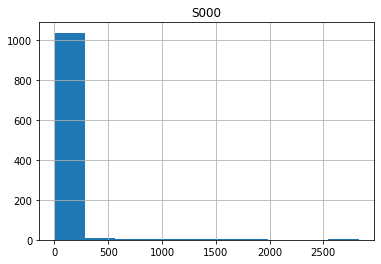

In [5]:
CBD_df.hist()

In [7]:
# url = 'http://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_36_tract_500k.zip'
# local_path = 'geo_files/'
# print('Downloading shapefile...')
# r = requests.get(url)
# z = zipfile.ZipFile(io.BytesIO(r.content))
# print("Done")
# z.extractall(path=local_path) # extract to folder
# filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 

# dbf, prj, shp, shx = [filename for filename in filenames]

county = gpd.read_file('geo_files/cb_2020_36_tract_500k.shp')
print("Shape of the dataframe: {}".format(county.shape))
print("Projection of dataframe: {}".format(county.crs))

nyc_CT=county[county.NAMELSADCO.isin(['Bronx County','Kings County', 'Queens County','New York County'])]
nyc_CT.set_crs(4269,allow_override=True)
nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
nyc_CT.head(n=2)
nyc_CT.GEOID=nyc_CT.GEOID.astype(int)

Shape of the dataframe: (5394, 14)
Projection of dataframe: epsg:4269


<ipython-input-7-e3513fa6023b>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
/Users/callieclark/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,centroid
29,36,005,012701,1400000US36005012701,36005012701,127.01,Census Tract 127.01,NY,Bronx County,New York,CT,108718,0,"POLYGON ((-73.89484 40.82624, -73.89387 40.826...",POINT (-73.89233 40.82564)
30,36,005,037300,1400000US36005037300,36005037300,373,Census Tract 373,NY,Bronx County,New York,CT,173453,0,"POLYGON ((-73.89337 40.84640, -73.89242 40.848...",POINT (-73.89014 40.84866)


In [46]:
nyc_cbd=CBD_df.merge(nyc_CT,how='right',left_on='w_geocode_ct',right_on='GEOID')
nyc_cbd=nyc_cbd.sort_values(by='S000',ascending=False)#
nyc_cbd = gpd.GeoDataFrame(nyc_cbd, geometry='geometry')
print('Total Jobs: ',nyc_cbd['S000'].sum())

Total Jobs:  12804.0


In [48]:
#five CBDs
jobs_in_cbd=nyc_cbd.sort_values(by='S000',ascending=False).head(n=5)['S000'].sum()
jobs_in_cbd/nyc_cbd.sort_values(by='S000',ascending=False)['S000'].sum()
print('Percent of Jobs in 5 CBDS',jobs_in_cbd/nyc_cbd.sort_values(by='S000',ascending=False)['S000'].sum()*100,'%')

Percent of Jobs in 5 CBDS 64.63605123398938 %


In [49]:
#10 CBDs
jobs_in_cbd=nyc_cbd.sort_values(by='S000',ascending=False).head(n=10)['S000'].sum()
print('Percent of Jobs in 10 CBDS',jobs_in_cbd/nyc_cbd.sort_values(by='S000',ascending=False)['S000'].sum()*100,'%')

Percent of Jobs in 10 CBDS 83.22399250234301 %


In [57]:
#nyc_cbd[['GEOID','S000','geometry', 'centroid']].head(n=10).to_csv('Top_10_CBDs.csv')

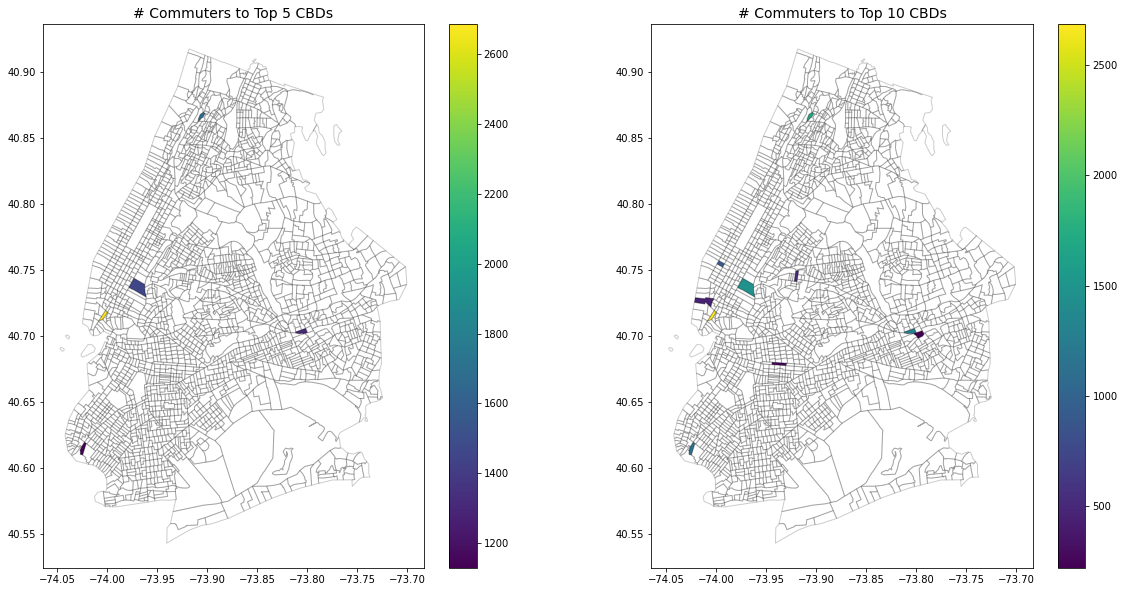

In [21]:
fig,(ax1,ax2)=plt.subplots(ncols=(2),nrows=(1),figsize=(20,10)) #standardize scale!!
nyc_cbd.head(n=5).plot(ax=ax1, column='S000', legend=True)
nyc_CT.plot(ax=ax1,color='none',alpha=0.2)

nyc_cbd.head(n=10).plot(ax=ax2, column='S000', legend=True)
nyc_CT.plot(ax=ax2,color='none',alpha=0.2)
ax1.set_title('# Commuters to Top 5 CBDs',fontsize=14);
ax2.set_title('# Commuters to Top 10 CBDs',fontsize=14);